In [6]:
import pandas as pd
import nltk
import math
import numpy as np
import matplotlib.pyplot as plt
#nltk.download('stopwords')
#nltk.download('punkt')

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
data = pd.read_csv('annotations_metadata.csv', na_values = ['idk/skip'], index_col = 'file_id')
data.dropna(axis = 0, inplace = True)

In [8]:
#train
temp = data.head(math.floor(len(data)*0.7))
filenames = temp[temp.label == 'hate'].index
word_frequencies = {}
for file in filenames:
    ifile = open('./all_files/'+file+'.txt')
    try:
        file_contents = ifile.read()
    except:
        continue
    for word in nltk.word_tokenize(file_contents):
        word = word.lower()
        if word not in stopwords and len(word)>2 and word.isalpha():
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    ifile.close()

In [9]:
#predict
test_file_count = math.ceil(len(data)*0.3)
filenames = data.tail(test_file_count).index
results = dict()
for file in filenames:
    ifile = open('./all_files/'+file+'.txt')
    try:
        file_contents = ifile.read()
    except:
        continue
    score, count = 0, 0
    for word in nltk.word_tokenize(file_contents):
        word = word.lower()
        if word not in stopwords and len(word)>2 and word.isalpha():
            count += 1
            score += word_frequencies.get(word, 0)
    if count != 0:
        avg_score = score/count
    else:
        avg_score = 0
    results[file] = avg_score

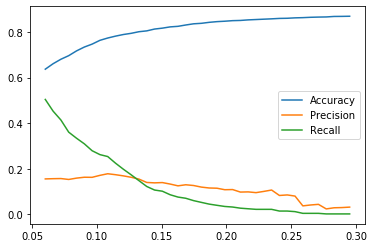

In [10]:
#analyse
max_score = max(results.values())
accuracy, precision, recall, cutoffs = list(), list(), list(), list()
for i in range(10, 50):
    tp, tn, fp, fn = 0, 0, 0, 0
    cutoff = i/max_score
    for k,v in results.items():
        normal_score = v/max_score
        if normal_score > cutoff:
            if data.loc[k, 'label'] == 'hate':
                tp += 1
            else:
                fp += 1
        else:
            if data.loc[k, 'label'] == 'noHate':
                tn += 1
            else:
                fn += 1
    accuracy.append((tp+tn)/(tp+tn+fp+fn))
    precision.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))
    cutoffs.append(cutoff)
plt.plot(cutoffs, accuracy, label = 'Accuracy')
plt.plot(cutoffs, precision, label = 'Precision')
plt.plot(cutoffs, recall, label = 'Recall')
plt.legend()
plt.show()